# Project: Predicting Usage of a Video Game Research Server
## Link to GitHub repository
https://github.com/yang67776/dsci-100-2025s-project.git
## Backgroud
This Project is based on the data collected by a research group in Computer Science at UBC, led by Frank Wood. They have set up a MineCraft server and recorded players' actions worldwide. 
## Question
This project will explore the question: Can played hours and age of players predict the probability of a player subscribing to a game-related newsletter in the dataset players.csv?
## Data
This data contains five experience levels (player skill levels) of players: Beginner, Amateur, Regular, Veteran, and Pro. It also contains information on whether the players subscribe to a game-related newsletter, their played hours(how long they have played the game), hashed email, name, gender, and age. The irrelevant variables, hashed email, name, experience levels, and gender, will be removed for the purpose of this project's analysis. The clean data will only contain these three variables: whether the players subscribe to a game-related newsletter, players' played hours, and their age.

## Method
I will use classification 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
player <- read_csv("players.csv")
head(player)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
clean_player_data <- filter(player, played_hours != "NA", Age != "NA") |>
          select(subscribe, played_hours, Age)
        head(clean_player_data)

subscribe,played_hours,Age
<lgl>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17


## summary of the data set

In [4]:
 clean_player_data |>
summarize(max_played_hours = max(played_hours, na.rm = TRUE),
 min_played_hours = min(played_hours, na.rm = TRUE),
 mean_played_hours = mean(played_hours, na.rm = TRUE),
 max_age = max(Age, na.rm = TRUE),
min_age = min(Age, na.rm = TRUE),
mean_age = mean(Age, na.rm = TRUE))

max_played_hours,min_played_hours,mean_played_hours,max_age,min_age,mean_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,5.904639,50,8,20.52062


In [16]:
num_subscribe_in_played_hours <- clean_player_data |>
filter(played_hours !=0) |>
group_by(played_hours) |>
  summarize(total_players = n(),
             sum_players_is_sub = sum(subscribe == TRUE))
num_subscribe_in_played_hours

played_hours,total_players,sum_players_is_sub
<dbl>,<int>,<int>
0.1,33,23
0.2,9,7
0.3,5,3
0.4,5,4
0.5,4,4
0.6,5,5
0.7,3,3
0.8,2,2
0.9,1,0


**I filtered out the players with 0 played_hours, because the number of subscriptions 
in this group was unusual. 
This is likely caused by system-automated subscriptions. These data points 
 do not meet the requirements for further analysis.**

In [22]:
num_subscribe_in_age <- clean_player_data |>
group_by(Age) |>
  summarize(total_players = n(),
             sum_players_is_sub = sum(subscribe == TRUE))
num_subscribe_in_age

Age,total_players,sum_players_is_sub
<dbl>,<int>,<int>
8,1,1
9,1,1
10,1,1
11,1,1
12,1,1
14,2,2
15,2,2
16,3,3
17,75,58


In [50]:
filtered_player_data <- clean_player_data |>
 mutate(subscribe = as.factor(subscribe)) |>
filter(played_hours !=0)
filtered_player_data

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.1,17
TRUE,1.6,23
TRUE,1.5,25
TRUE,0.2,22
TRUE,48.4,17


## visualization

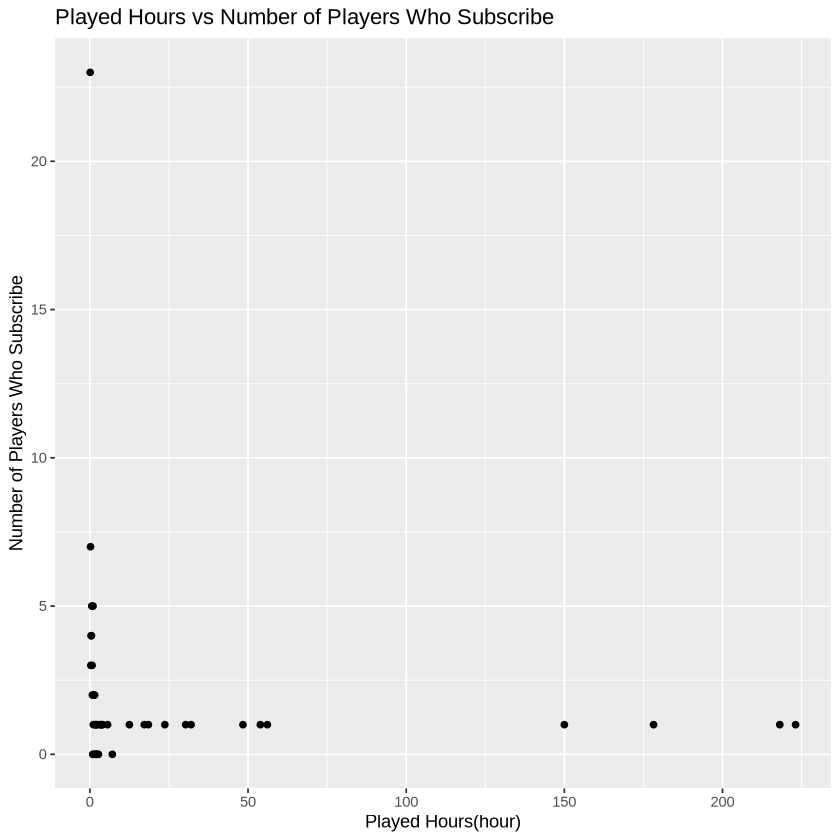

In [51]:
# subscribe vs played_hours 
played_hours_sub <- num_subscribe_in_played_hours |> ggplot(aes(x = played_hours, y = sum_players_is_sub)) +
  geom_point() +
labs(title =  "Played Hours vs Number of Players Who Subscribe",
       x = "Played Hours(hour) of players",
       y = "Number of Players Who Subscribe")
played_hours_sub

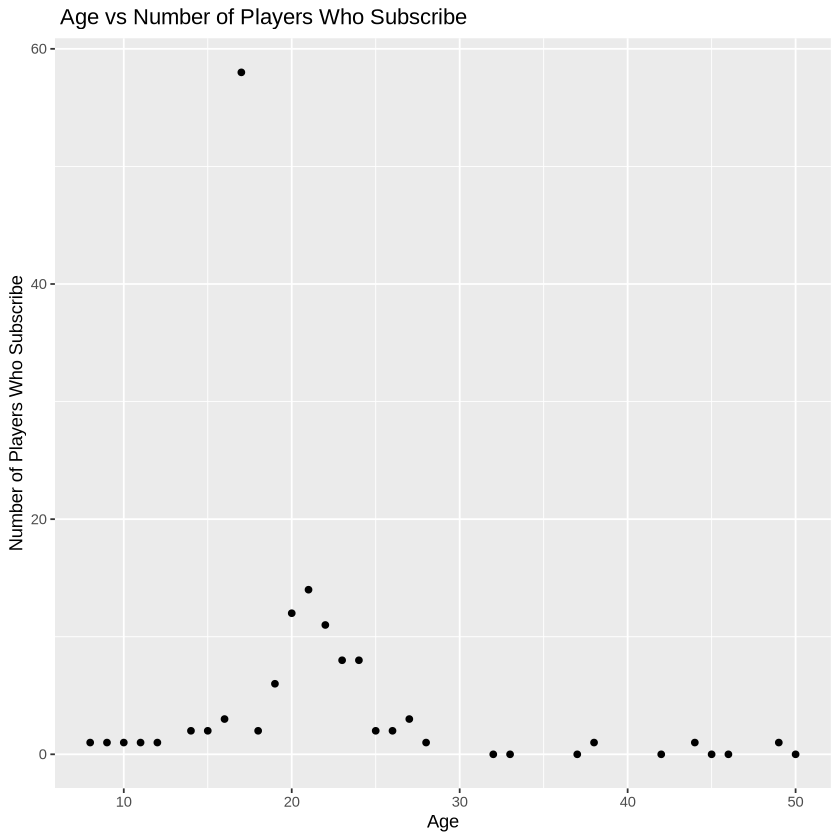

In [52]:
# subscribe vs Age 
Age_sub <- num_subscribe_in_age |> ggplot(aes(x = Age, y = sum_players_is_sub)) +
  geom_point() +
labs(title =  " Age vs Number of Players Who Subscribe",
       x = "Age of Players",
       y = "Number of Players Who Subscribe")
Age_sub

## Insight

**The Played Hours vs Number of Players Who Subscribe plot shows that
the majority of players who subscribe are centered in the lower playtime range.
While there's no strong linear relationship between played hours and the number of players who subscribe, Played hours can still contribute to predict the subscribe state with other predictors.**

**This Age vs Number of Players Who Subscribe plot shows that around age 17, the number of players who subscribe is the highest, and the second peak is around age 21. The majority of subscriber's age is between age 14 and age 28. This suggests that younger players are more likely to subscribe. So the played_hour can be a predictor.**

## Model

**Method: 
I will use classification because the prediction target "Subscribe" is binary. And this method is intuitive to use two predictors(played_hours, Age) to predict "Subscribe". Subscribe is not numerical, so I can't use regression. And there is a label (confirmed result), so I can't use cluster. Finally, I chose the classification method.**

Assumption:

1. Data is independently
   
2. The relationship between prediction target and predictors can be captured by the model

Potential limitations:
1. Overfitting may occur
2. The played hour is not a very strong predictor

In [53]:
library(tidymodels)

In [54]:
set.seed(1234)
data_split <- initial_split(filtered_player_data, prop = 0.75, strata = subscribe)
data_train <- training(data_split)
data_test <- testing(data_split)

In [55]:
my_recipe <- recipe(subscribe ~ played_hours + Age, data = filtered_player_data) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [56]:
my_vfold <- vfold_cv(data_train, v = 5, strata = subscribe)
k_vals <- tibble(neighbors = seq(1, 10, 2))

In [57]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

In [67]:
knn_fit <- workflow() |>
  add_recipe(my_recipe) |>
  add_model(knn_spec) 
tuned_result <- tune_grid(knn_fit, resamples = my_vfold, grid = k_vals) |>
collect_metrics()
tuned_result

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7403922,5,0.08301693,Preprocessor1_Model1
1,roc_auc,binary,0.6621795,5,0.10864675,Preprocessor1_Model1
3,accuracy,binary,0.7372549,5,0.08379687,Preprocessor1_Model2
3,roc_auc,binary,0.7378205,5,0.08722661,Preprocessor1_Model2
5,accuracy,binary,0.8141176,5,0.02869988,Preprocessor1_Model3
5,roc_auc,binary,0.7438034,5,0.06246520,Preprocessor1_Model3
7,accuracy,binary,0.7890196,5,0.02560757,Preprocessor1_Model4
7,roc_auc,binary,0.6670940,5,0.09220624,Preprocessor1_Model4
9,accuracy,binary,0.7654902,5,0.01055186,Preprocessor1_Model5


In [70]:
# find best K
tuned_result |>
filter(.metric == "accuracy") |>
arrange(-mean) |>
select(neighbors)|>
slice(1)|>
pull()

[1] 5

**I choose k = 5 model, because it has the highest average accuracy during cross-validation**


**First, I split the dataset into a 75% training set and a 25% test set
For the training set, I applied 5-fold cross-validation**

In [79]:
# Use k = 5 classification model
knn_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = 5) |>
set_engine("kknn") |>
set_mode("classification")
knn_fit <- workflow() |>
  add_recipe(my_recipe) |>
  add_model(knn_spec) |>
  fit(data = data_train)

my_predict <- predict(knn_fit, data_test) |>
bind_cols(data_test)

my_result <- my_predict |> 
metrics(truth = subscribe, estimate= .pred_class)
my_result

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6785714
kap,binary,0.0000000


## Creates a Visualization of The Analysis

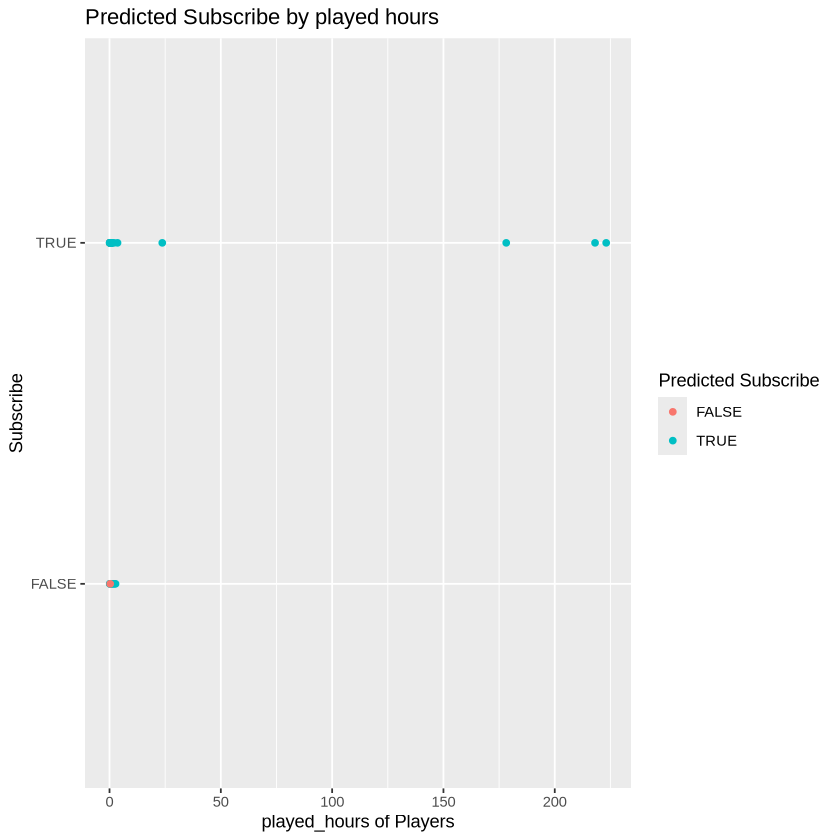

In [91]:
# The relationship between players' played hours and whether they subscribe
# Color suggests the predicted subscription 
ggplot(my_predict, aes(x = played_hours, y = subscribe, color = .pred_class)) +
  geom_point() +
  labs(title = "Predicted Subscribe by played hours",
    x = "played_hours of Players",
    y = "Subscribe",
    color = "Predicted Subscribe")

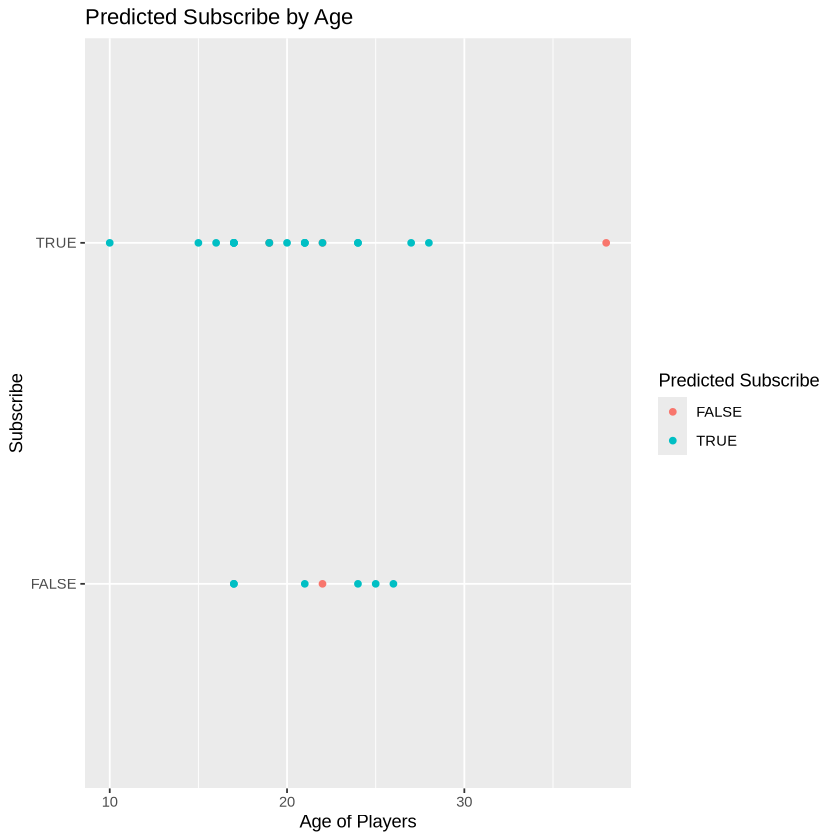

In [92]:
# The relationship between players' age and whether they subscribe
# Color suggests the predicted subscription 
ggplot(my_predict, aes(x = Age, y = subscribe, color = .pred_class)) +
  geom_point() +
  labs(title = "Predicted Subscribe by Age",
    x = "Age of Players",
    y = "Subscribe",
    color = "Predicted Subscribe")

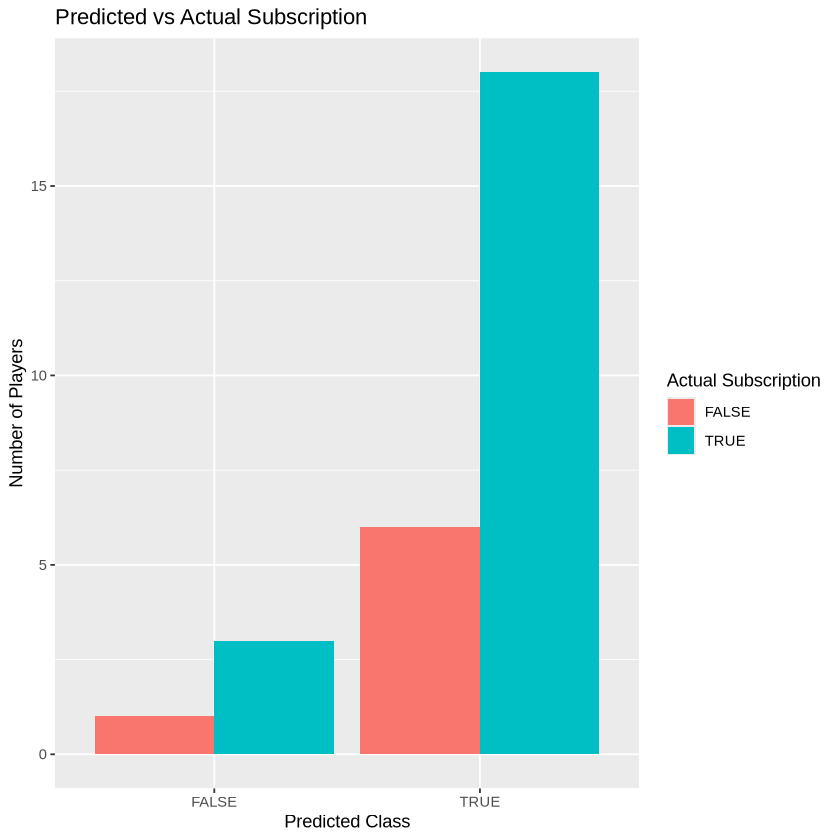

In [93]:
ggplot(my_predict, aes(x = .pred_class, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Predicted vs Actual Subscription",
    x = "Predicted Class",
    y = "Number of Players",
    fill = "Actual Subscription")

"Predicted Subscribe by played hours":
 The majority of players who subscribe are centered in the lower playtime range, and the model almost successfully predicts this part. However, the model misclassified some players who actually subscribed as non-subscribers.

"Predicted Subscribe by Age"：
The model predicts that younger players are more likely to subscribe, which aligns with the actual trend, but it overpredicts subscriptions among younger players. 

This is what you expected to find, but the model predicts most observations as TRUE, suggesting it may be overfitting.

Impact: Game company can use the model, and focus on players aged 14 to 28 and boost subscription rates

Future question: Can we improve the model's accuracy by adding the experience level or other predictors?

 